# Creating Convolutional Neural Networks Using Keras Framework

Reference Source: https://www.youtube.com/watch?v=NyYM6HnyX8I&list=PLBtyBPTlyC7tnpPDkp_E2JgIgIQSbugJL&index=15

In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.optimizers import RMSprop


(mnist_train_images, mnist_train_labels), (mnist_test_images, mnist_test_labels) = mnist.load_data()

C:\Users\Darshil\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


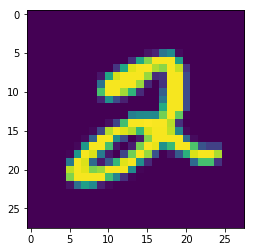

In [13]:
import matplotlib.pyplot as plt

a = mnist_train_images[5]


plt.imshow(a)
plt.show()

In [3]:
from keras import backend as K

if K.image_data_format() == "channels_first":
    train_images = mnist_train_images.reshape(mnist_train_images.shape[0], 1, 28,28)
    test_images = mnist_test_images.reshape(mnist_test_images.shape[0],1,28,28)
    input_shape = (1,28,28)
    
else:
    train_images = mnist_train_images.reshape(mnist_train_images.shape[0], 28,28,1)
    test_images = mnist_test_images.reshape(mnist_test_images.shape[0], 28,28,1)
    input_shape = (28,28,1)

# normalizing data
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
train_images = train_images/255
test_images = test_images/255

In [4]:
# Important to note that we convert the categorical y labels into one hot-encoded 10x1 dimenson labels (for each example)
train_labels = keras.utils.to_categorical(mnist_train_labels,10)
test_labels = keras.utils.to_categorical(mnist_test_labels,10)

In [5]:
input_shape

(28, 28, 1)

### Lets display an image

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


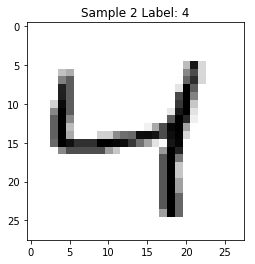

In [8]:
# taking this directly from reference article

import matplotlib.pyplot as plt

def display_sample(num):
    #print the one-hot array of this samples label
    print (train_labels[num])
    
    # print the label copnverted back to a number
    label = train_labels[num].argmax(axis=0)
    
    #reshape the 768 values to a 28x28 image
    image = train_images[num].reshape([28,28])
    plt.title('Sample %d Label: %d' % (num,label))
    plt.imshow(image, cmap = plt.get_cmap('gray_r'))
    plt.show()
    %matplotlib inline  

display_sample(2)    

# Building out the CNN

In [9]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3), activation='relu', input_shape = input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(10, activation = 'softmax'))


In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               692352    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total para

In [11]:
model.compile(loss = 'categorical_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])

In [86]:
history = model.fit(train_images,train_labels,
                   batch_size = 128,
                   epochs=6,
                   verbose=2,
                   validation_data = (test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/6
 - 42s - loss: 0.0336 - acc: 0.9896 - val_loss: 0.0346 - val_acc: 0.9874
Epoch 2/6
 - 43s - loss: 0.0281 - acc: 0.9911 - val_loss: 0.0342 - val_acc: 0.9879
Epoch 3/6
 - 41s - loss: 0.0264 - acc: 0.9917 - val_loss: 0.0331 - val_acc: 0.9891
Epoch 4/6
 - 42s - loss: 0.0235 - acc: 0.9926 - val_loss: 0.0350 - val_acc: 0.9889
Epoch 5/6
 - 38s - loss: 0.0226 - acc: 0.9927 - val_loss: 0.0340 - val_acc: 0.9886
Epoch 6/6
 - 38s - loss: 0.0198 - acc: 0.9935 - val_loss: 0.0386 - val_acc: 0.9879


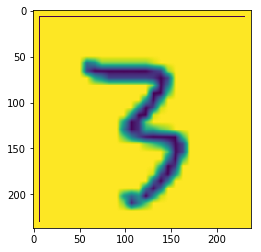

In [83]:
"""
PREDICT ON NEW IMAGE
- first we take in an image using PIL
- then we convert it into array format, reshape and then use it to predict
"""
# Predict
from PIL import Image
import numpy as np

def load_image(infilename) :
    img = Image.open( infilename )
    img.load()
    data = np.asarray( img, dtype="int32" )
    img = data[:,:,0]/255   
    return img
    
    
#before we predict, we need to resize our image to match the input shape
image = load_image('C:/Users/Darshil/Desktop/3.png')
plt.imshow(image)

In [84]:
from skimage.transform import resize
img_resized = resize(image, (28,28))

C:\Users\Darshil\Anaconda3\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


In [85]:
#predicting using the resized image
print (model.predict_classes(img_resized.reshape(1,28,28,1)), model.predict(img_resized.reshape(1,28,28,1)))

[3] [[6.8791059e-04 6.4179963e-05 5.7660071e-03 7.2697973e-01 5.1732385e-04
  8.0039417e-03 1.1933318e-03 5.5236965e-02 1.8845592e-01 1.3094791e-02]]


[Note: On image dimensions to pass to CNN](https://stackoverflow.com/questions/41563720/error-when-checking-model-input-expected-convolution2d-input-1-to-have-4-dimens?answertab=votes#tab-top)

### Saving Our model to deploy to Keras

In [87]:
model.save('C:/Users/Darshil/gitly/Deep-Learning/My Projects/mnist_simple.h5')

# from keras.models import load_model
# if you want to test it out but we've done this in flask so no worries